<a href="https://colab.research.google.com/github/lambopancake/happy_sad-Classifier/blob/main/Happy_sad_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lambopancake","key":"3f5385533027e7d93f26fcf0180bb861"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d amromeshref/happy-or-sad-classifier

 98% 199M/203M [00:02<00:00, 142MB/s]
100% 203M/203M [00:02<00:00, 99.1MB/s]


In [ ]:
! unzip happy-or-sad-classifier.zip

Streaming output truncated to the last 5000 lines.
  inflating: happy/ffhq_423.png      
  inflating: happy/ffhq_4230.png     
  inflating: happy/ffhq_4231.png     
  inflating: happy/ffhq_4232.png     
  inflating: happy/ffhq_4233.png     
  inflating: happy/ffhq_4234.png     
  inflating: happy/ffhq_4235.png     
  inflating: happy/ffhq_4236.png     
  inflating: happy/ffhq_4237.png     
  inflating: happy/ffhq_4238.png     
  inflating: happy/ffhq_4239.png     
  inflating: happy/ffhq_424.png      
  inflating: happy/ffhq_4240.png     
  inflating: happy/ffhq_4241.png     
  inflating: happy/ffhq_4242.png     
  inflating: happy/ffhq_4243.png     
  inflating: happy/ffhq_4244.png     
  inflating: happy/ffhq_4245.png     
  inflating: happy/ffhq_4246.png     
  inflating: happy/ffhq_4247.png     
  inflating: happy/ffhq_4248.png     
  inflating: happy/ffhq_4249.png     
  inflating: happy/ffhq_425.png      
  inflating: happy/ffhq_4250.png     
  inflating: happy/ffhq_4251.png     

In [ ]:
import os

In [ ]:
os.chdir("/content/happy/")
hList = os.listdir()
os.chdir("/content/sad/")
sList = os.listdir()
print("happy :",len(hList))
print("sad   :",len(sList))
dif = len(hList) - len(sList)
print("difference ", dif)

happy : 3190
sad   : 3189
difference  1


In [ ]:
from PIL import Image
aSet = set()
aTest = [0,0,0,0]#peg 0, jpg 1, png 2
os.chdir("/content/sad/")
aList = os.listdir()
for i in aList:

  if(i[-3:] == "peg"):
    aTest[0] += 1
    os.remove(i)
  elif(i[-3:] == "jpg"):
    aTest[1] += 1
  elif(i[-3:] == "png"):
    aTest[2] += 1
    img_png = Image.open(i).convert("RGB")
    img_png.save(i[:-3] + "jpg")
    os.remove(i)
    #print(i[:-3] + "jpg")
  else:
    aTest[3] += 1

  aSet.add(i[-3:])

print(len(aList))
print(aSet)
print(aTest)

3189
{'jpg'}
[0, 3189, 0, 0]


In [ ]:
from pathlib import Path
import imghdr

data_dir = ["/content/sad/","/content/happy/"]
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for i in data_dir:
  for filepath in Path(i).rglob("*"):
      if filepath.suffix.lower() in image_extensions:
          img_type = imghdr.what(filepath)
          if img_type is None:
              print(f"{filepath} is not an image")
              os.remove(filepath)
          elif img_type not in img_type_accepted_by_tf:
              print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
              os.remove(filepath)

In [ ]:
from random import sample
deleteThese = sample(hList, dif)
os.chdir("/content/happy/")
for file_ in deleteThese:
  os.remove(file_)


In [ ]:
os.chdir("/content/happy/")
hList = os.listdir()
os.chdir("/content/sad/")
sList = os.listdir()
print("happy :",len(hList))
print("sad   :",len(sList))
dif = len(hList) - len(sList)
print("difference ", dif)

happy : 3189
sad   : 3189
difference  0


In [ ]:
file_list = []
inner_folder = []

for folder in ["happy","sad"]:
  os.chdir(f"/content/{folder}")
  inner_folder = os.listdir()
  for file_ in inner_folder:
    file_list.append(f"/content/{folder}/{file_}")

In [ ]:
import random
import matplotlib.pyplot as plt
import cv2

In [ ]:
sample_images = random.sample(file_list, 16)

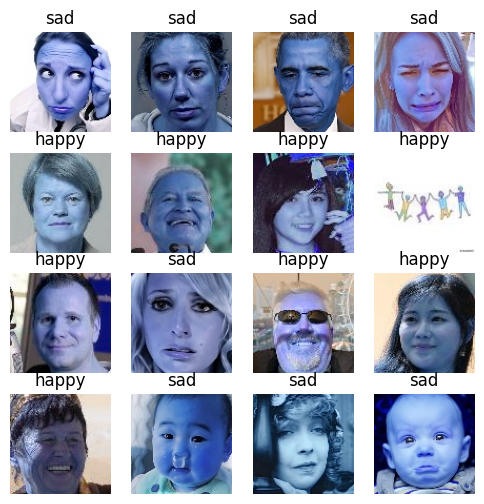

In [ ]:
figure = plt.figure(figsize = (6,6))
i = 1
for images in sample_images:
  image = cv2.imread(os.path.join(images))
  figure.add_subplot(4,4, i)
  plt.axis("off")
  plt.title(images.split("/")[2])
  plt.imshow(image)
  i += 1

In [ ]:
labels = []

for i in file_list:
  labels.append(i.split("/")[2])

In [ ]:
for i in range(20):
  r = random.randint(0, len(file_list))
  print(file_list[r], " ", labels[r])

/content/happy/ffhq_1545.jpg   happy
/content/sad/image0026339.jpg   sad
/content/sad/image0022928.jpg   sad
/content/sad/image0029666.jpg   sad
/content/sad/image0016225.jpg   sad
/content/happy/images241.jpg   happy
/content/happy/ffhq_3595.jpg   happy
/content/sad/image0020137.jpg   sad
/content/happy/images.jpg   happy
/content/sad/image0029967.jpg   sad
/content/sad/image0027748.jpg   sad
/content/sad/image0016555.jpg   sad
/content/sad/image0027755.jpg   sad
/content/sad/image0024651.jpg   sad
/content/happy/ffhq_2285.jpg   happy
/content/sad/image0018832.jpg   sad
/content/happy/ffhq_1333.jpg   happy
/content/sad/sadness-cartoon-man-clip-art-cartoon-sad-people.jpg   sad
/content/happy/ffhq_4365.jpg   happy
/content/happy/ffhq_3596.jpg   happy


In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import numpy as np

In [ ]:
def load_images(path, label):
  image = tf.io.read_file(path)
  image = tf.io.decode_image(image, channels = 3, expand_animations = False)
  image = tf.image.resize(image, [32,32])
  image = tf.cast(image, tf.float32) / 255
  if label == "sad": label = [0]
  else: label = [1]
  return image, label

In [ ]:
# lambda label: 0 if label == 'sad' else 1
# labels = np.array(labels)
# print(label('sad'))
# #labels = to_categorical(label(labels), 2)
# print(labels.shape)

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((file_list,labels))
dataset = dataset.shuffle(buffer_size=6400)
dataset = dataset.map(load_images)
dataset = dataset.batch(16)

In [ ]:
iter_dataset = dataset.as_numpy_iterator()

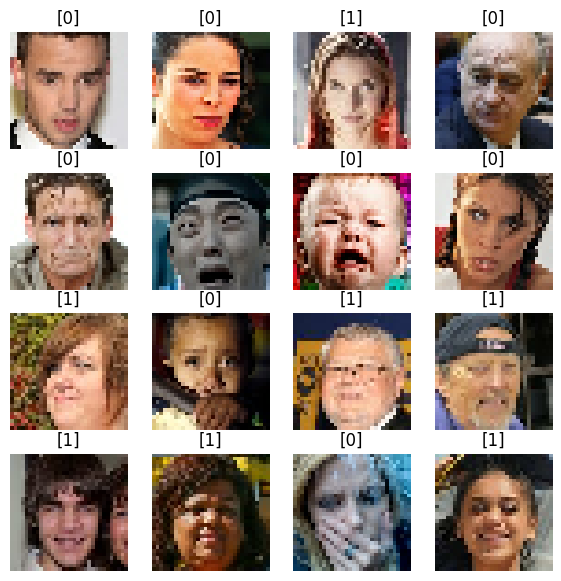

In [ ]:
batch_one = iter_dataset.next()

i = 1
row, col = 4,4
fig = plt.figure(figsize = (7,7))
for label,images in enumerate(batch_one[0]):
  fig.add_subplot(row, col, i)
  plt.axis("off")
  plt.title(batch_one[1][label])
  plt.imshow(images)
  i += 1


In [ ]:
print(tf.data.experimental.cardinality(dataset)) #400 batches

tf.Tensor(399, shape=(), dtype=int64)


In [ ]:
dataSize = int(tf.data.experimental.cardinality(dataset))
train_size = int(dataSize * 0.8)

train_dataset = dataset.take(train_size)
test_dataset = dataset.skip(train_size)

In [ ]:
from keras.applications.vgg16 import VGG16

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
# model = tf.keras.applications.VGG16(include_top = False, classifier_activation = "softmax")

# model.compile(optimizer = 'adam',
#               loss = 'sparse_categorical_crossentropy')

model = Sequential([Conv2D(16, (3,3), 1, activation = 'relu', input_shape = (32,32,3)),
					MaxPooling2D(),
					Conv2D(32, (3,3), 1, activation = 'relu'),
					MaxPooling2D(),
					Conv2D(16, (3,3), 1, activation = 'relu'),
					MaxPooling2D(),
					Flatten(),
					Dense(256, activation = 'relu'),
					Dense(1, activation = 'sigmoid')])

model.compile(optimizer = 'adam',
				loss = 'binary_crossentropy',
				metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 15, 15, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 6, 6, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 16)          4624      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 2, 2, 16)         

In [ ]:
hist = model.fit(train_dataset, epochs = 10)

Epoch 1/10
319/319 [==============================] - 4s 13ms/step - loss: 0.0160 - accuracy: 0.9963
Epoch 2/10
319/319 [==============================] - 8s 23ms/step - loss: 0.0196 - accuracy: 0.9947
Epoch 3/10
319/319 [==============================] - 4s 11ms/step - loss: 0.0181 - accuracy: 0.9943
Epoch 4/10
319/319 [==============================] - 4s 13ms/step - loss: 0.0165 - accuracy: 0.9953
Epoch 5/10
319/319 [==============================] - 3s 9ms/step - loss: 0.0050 - accuracy: 0.9982
Epoch 6/10
319/319 [==============================] - 3s 10ms/step - loss: 0.0056 - accuracy: 0.9984
Epoch 7/10
319/319 [==============================] - 4s 14ms/step - loss: 0.0111 - accuracy: 0.9967
Epoch 8/10
319/319 [==============================] - 4s 14ms/step - loss: 0.0292 - accuracy: 0.9902
Epoch 9/10
319/319 [==============================] - 4s 11ms/step - loss: 0.0087 - accuracy: 0.9975
Epoch 10/10
319/319 [==============================] - 5s 14ms/step - loss: 0.0058 - accurac

In [ ]:
acc = model.evaluate(test_dataset, verbose = 2)
print(acc)


80/80 - 4s - loss: 0.0069 - accuracy: 0.9976 - 4s/epoch - 51ms/step
[0.006947497371584177, 0.9976451992988586]


In [ ]:
pred = model.predict(test_dataset)

80/80 [==============================] - 3s 6ms/step


In [ ]:

def imagesToLabels(imageList):
  aList = []
  for i in imageList:
    aList.append(i.split("/")[2])
  return aList

1/1 [==============================] - 0s 19ms/step


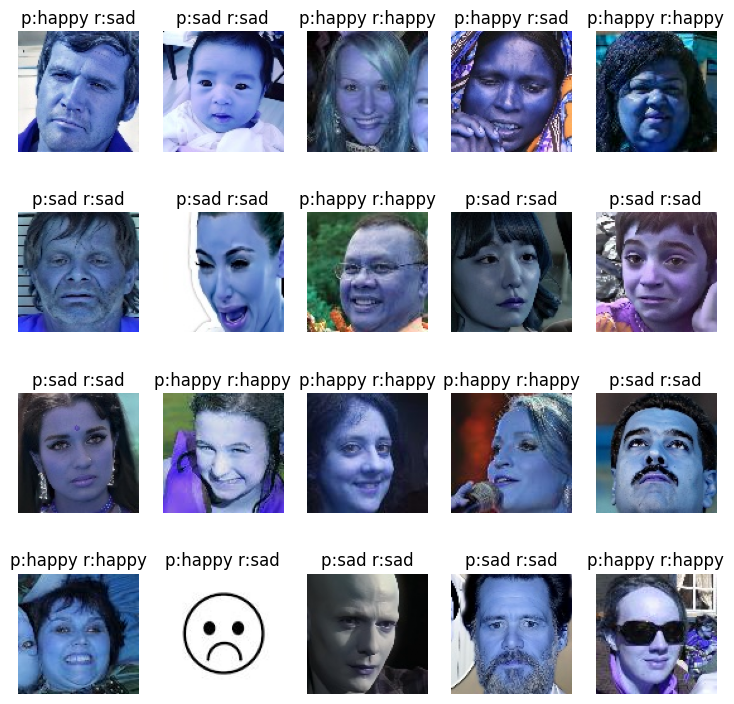

In [ ]:
test_images = random.sample(file_list, 20)
label_list = imagesToLabels(test_images)

#predict = model.predict(test_images)

i = 1
row, col = 4,5
fig = plt.figure(figsize = (9,9))
for images in test_images:
  img2 = cv2.imread(os.path.join(images)) /255
  img = cv2.resize(img2,(32,32), interpolation = cv2.INTER_AREA)
  x = np.expand_dims(img, axis = 0)
  predict = model.predict(x)
  fig.add_subplot(row, col, i)
  plt.axis("off")
  if(predict < 0.5):
    plt.title("p:sad r:" + images.split("/")[2])
  else:
    plt.title("p:happy r:" + images.split("/")[2])
  # plt.title(predict)
  plt.imshow(img2)
  i += 1
